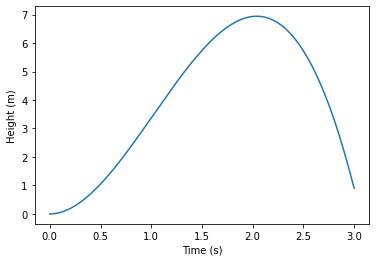

In [66]:
# Homework 6
# Drake Joseph

# Undergraduate student:
# A person throws a ball upwards at a speed of 10 m/s, please calculate the trajectory using Runge-Kutta method
# and plot height (z) vs time (t).

#-----------------------------------------------------------#

import numpy as np
import matplotlib.pyplot as plt

#Initial variables
tend=3
h=0.001
y=[1.,0.]
t=0
#Since ball is thrown upwards, theta = 90 degrees. 
#Just use a kinematic equation to solve (don't need theta).

#Define trajectory functions
def f(t, y):
    f=np.zeros(2)
    f[0]=y[1] 
    f[1]=(0 + 10*t-(9.8*(t**2))/2) #Kinematic equation
    return f

#-----------------------------------------------------------#
#Runge Kutta 4 scheme taken from Lecture 7
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y = y + (1/6)*(k1+2*k2+2*k3+k4)
    return y

#-----------------------------------------------------------#
#Fill x and y arrays with values
xp=[]
yp=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,2)
    xp=np.append(xp,t)#Append t values into x axis array
    yp=np.append(yp,y[1])#Append y values into y axis array
    t = t+h

#-----------------------------------------------------------#
#Plot
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.plot(xp,yp)
plt.show()

#Conclusion: The above method yields an incorrect answer. However, only a few corrections to the trajectory functions
#should solve the problem. Analytical solutions show that the maximum height should be:
# Max height = 5.098m @ t = 1.02s, Final height = 0 @ t = 2.04s